# 선형모델
### 선형함수를 이용해서 출력을 예측하는 모델

- 선형함수? x를 그대로 사용 -> x 제곱을 사용하지 않음 -> 선의 형태를 가짐
- 비선형함수? ㅌ에 제곱이나 로그를 적용한 함수
Y = w*X +b

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.arange(1, 10, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [8]:
w=2
b=5
y=w*x+b
y

array([ 7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,
        9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2,
       11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4,
       13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6,
       15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8,
       18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. ,
       20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. , 22.2,
       22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2, 24.4,
       24.6, 24.8])

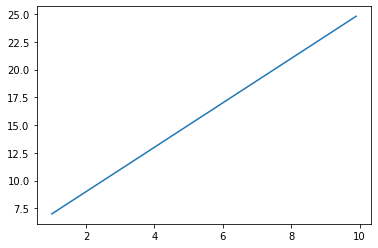

In [9]:
plt.plot(x, y)

(0, 10)

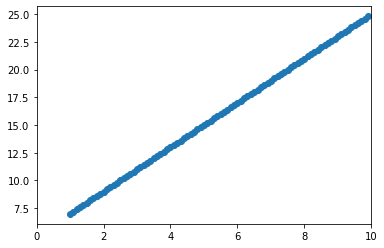

In [10]:
plt.scatter(x, y)
plt.xlim(0, 10)

In [11]:
x1 = np.arange(0, 10, 0.2)
x2 = np.arange(5, 10, 0.1)
len(x1)==len(x2)

True

In [12]:
w1, w2, b = 1, 2, 1
y = w1*x1 + w2*x2 + b

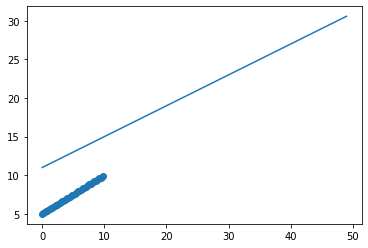

In [17]:
plt.scatter(x1,x2, label='X')
plt.plot(y, label='Y')
plt.xlabel='X'
plt.ylabel='Y'

## 나이와 키를 선형 함수로 모델링 해보자
x : 사람의 나이
y : 사람의 키

In [33]:
x = [1, 5, 10, 15, 20, 25, 30]
y = [55, 110, 140, 160, 175, 176, 176]
x_test = [3, 12, 23, 33]

In [34]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1).fit(X, y)

In [35]:
X = np.array(x).reshape([-1, 1])
y = np.array(y)
x_test = np.array(x_test).reshape([-1, 1])
X.shape, y.shape

((7, 1), (7,))

In [36]:
model.predict(x_test)

array([ 55., 140., 176., 176.])

In [38]:
w=2
b=55
fx=w*X+b

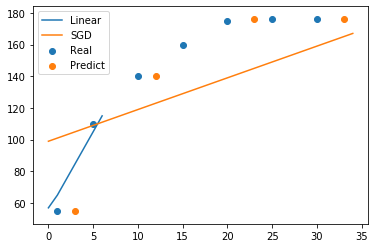

In [62]:
plt.scatter(x, y, label='Real')
plt.scatter(x_test, model.predict(x_test), label='Predict')
plt.plot(fx, label='Linear')

plt.plot(sgd_y, label='SGD')


plt.legend()

In [ ]:
# 오차측정
y_hat = w*X + b
np.sum((y-y_hat[:, 0])**2) / len(y)

In [53]:
# 탐욕적 탐색으로, w와 b 찾기
# 못쓰는 이유 : 시간이 오래 걸려서
cost_min = 100000000
for c in np.arange(0, 10, 0.1):
    for b in np.arange(-100, 100, 1):
        y_hat = w*X + b
        cost = np.sum((y-y_hat[:, 0])**2) / len(y)
        if cost < cost_min :
            cost_min = cost
            w_min = c
            b_min = b
cost_min, w_min, b_min

(833.2857142857143, 0.0, 99)

In [40]:
# 정규방정식으로 최선의 w와 b찾기
# 못쓰는 이유 : 메모리 부족 (방정식을 푸는 것이라서)
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression().fit(X, y)

In [42]:
lr.predict(x_test)

array([ 95.31750426, 129.70570698, 171.73573254, 209.94484668])

In [45]:
lr.score(X, y)

0.7948824753721947

In [54]:
lr.coef_, lr.intercept_

(array([3.82091141]), 83.8547700170358)

In [55]:
# stochastic gradient descent : 딥러닝에서 사용하는 방법으로 미분사용
# 가능한 이유 : 데이터를 작게 나눠서 반복적으로 마라미터를 업데이트
from sklearn.linear_model import SGDRegressor

In [56]:
sgd = SGDRegressor(alpha=0).fit(X, y)

In [57]:
sgd.coef_, sgd.intercept_

(array([4.4324097]), array([11.79928618]))

In [61]:
sgd_w = sgd.coef_
sgd_i = sgd.intercept_
sgd_y = w*np.arange(0, 35) + b

# 세계 행복 지수 예측하기

- 데이터를 읽어서, 정제(누락확인과 이상치 제거)
- 입력과 출력 분리(iloc, drop, ['컬럼선택'])
- 모델선택

In [65]:
import pandas as pd

In [69]:
df = pd.read_csv('./datasets/world-happiness-report/2017.csv', encoding='cp949')

In [70]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [72]:
df.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [73]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


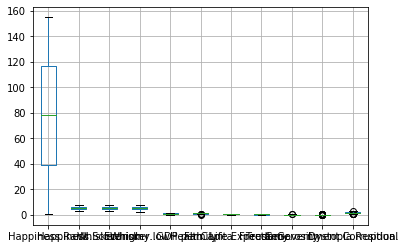

In [104]:
df.boxplot()

In [119]:
x = df.iloc[:, 5:]
y = df.iloc[:, 2:3]
x.shape, y.shape

((155, 7), (155, 1))

In [120]:
model_lr = LinearRegression().fit(x, y)

In [121]:
model_lr.coef_, model_lr.intercept_

(array([[1.0000883 , 0.99990462, 0.99992763, 1.00002217, 1.00019852,
         0.99975256, 0.99995448]]), array([0.00015811]))

In [122]:
model_lr.score(x, y)
x.shape, y.shape

((155, 7), (155, 1))

In [123]:
model_sgd = SGDRegressor().fit(x,y)
model_sgd.score(x, y) # 예측 성능은 결정계수로 평가한다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9639019234129885

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model_sgd.score(X_train,  y_train), model_sgd.score(X_test,  y_test)

(0.9637255986025655, 0.9643215694584512)

In [125]:
model_sgd.coef_

array([1.08778783, 1.01309819, 0.63998568, 0.46394029, 0.29512395,
       0.20777169, 0.9881883 ])

In [126]:
x.columns

Index(['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [127]:
happy = pd.DataFrame(data=model_sgd.coef_, index=x.columns)

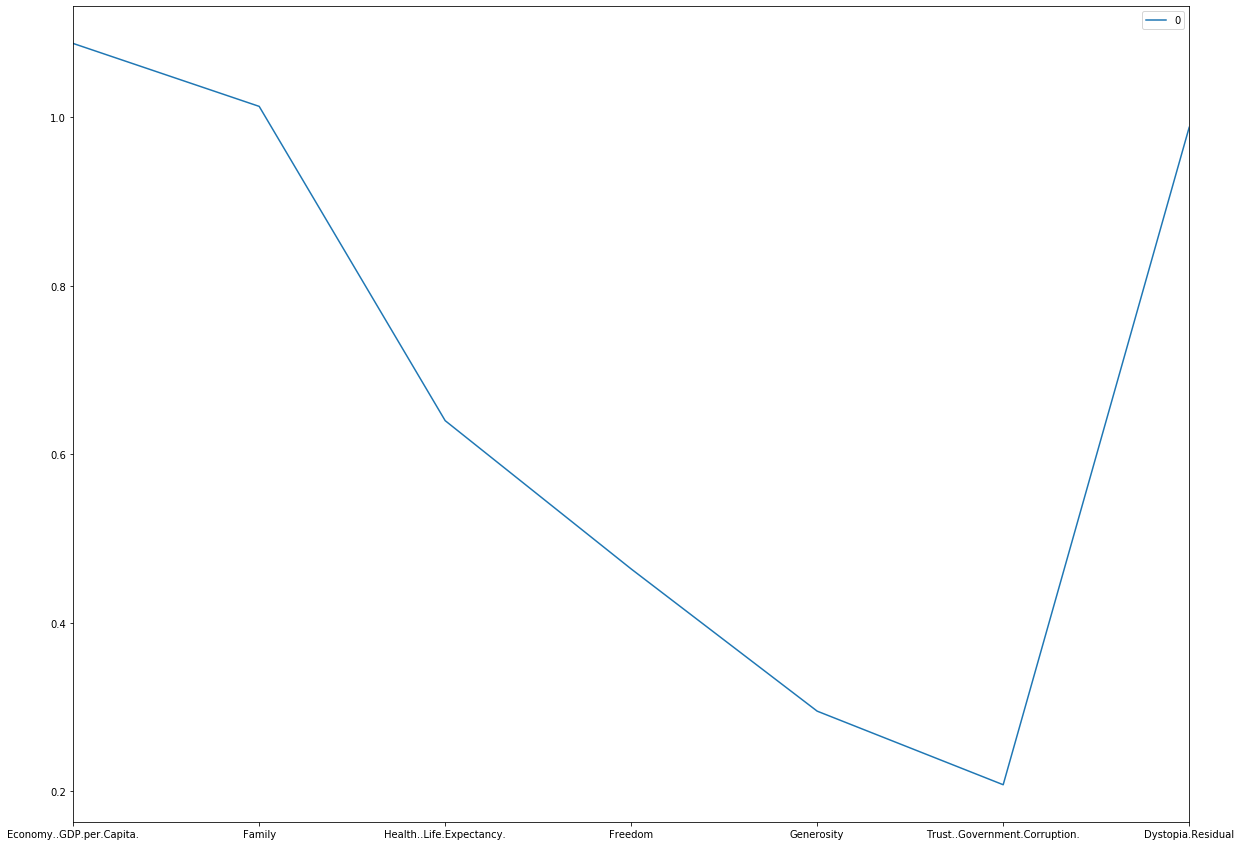

In [128]:
happy.plot(figsize=(20, 15))

In [129]:
happy

,0
Economy..GDP.per.Capita.,1.087788
Family,1.013098
Health..Life.Expectancy.,0.639986
Freedom,0.463940
Generosity,0.295124
Trust..Government.Corruption.,0.207772
Dystopia.Residual,0.988188


In [134]:
cond = df['Country']=='South Korea'
korea = df[cond]
model_sgd.predict(korea.iloc[:, 5:])

array([5.91861327])

# 유방암 진단 데이터
## 병원에서 유방암이 의심되는 환자들의 진단 검사를 통해 악성인지 양성인지 분류

In [136]:
from sklearn.datasets import load_breast_cancer

In [137]:
x, y = load_breast_cancer(return_X_y=True)

In [138]:
x.shape, y.shape

((569, 30), (569,))

In [139]:
data = load_breast_cancer()

In [140]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [142]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [144]:
x = data.data
y = data.target

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDRegressor, SGDClassifier
model = SGDClassifier().fit(X_train, y_train)
model.score(X_train,  y_train), model.score(X_test,  y_test)

(0.9028871391076115, 0.9574468085106383)

In [146]:
df = pd.DataFrame(data=x, columns=data.feature_names)
df.shape

(569, 30)